<a href="https://colab.research.google.com/github/hun9812/convex_optimization/blob/main/Fundamentals_of_Machine_Learning_(Lab_4)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentals of Machine Learning (Lab 4)

- Instructor: Jaemin Jo (Sungkyunkwan University)
- Topics to cover: convex optimization and linear regression

## Convex Optimization

In [ ]:
import cvxpy as cp
import numpy as np

### Unconstained Optimization

(1) Minimize $f(x, y) = (x-2)^4 + (x-2y)^2$

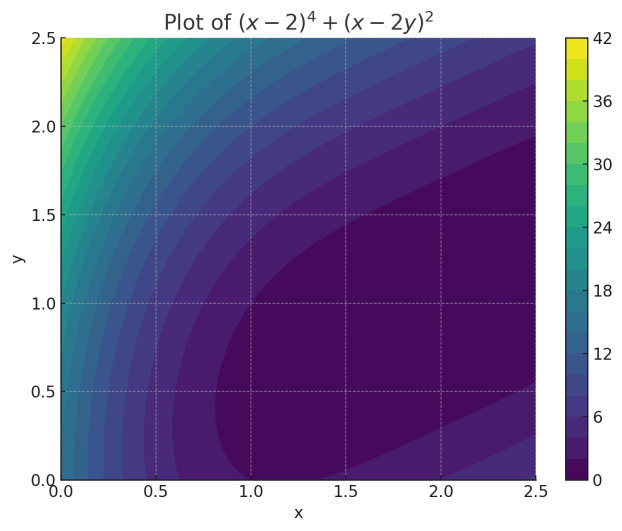


In [ ]:
x, y = cp.Variable(), cp.Variable()

obj = cp.Minimize((x-2)**4 + (x-2*y)**2)

prob = cp.Problem(obj)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value, y.value)

status optimal
optimal value 1.972152263052531e-31
optimal var 1.999999999996568 0.9999999999982838


(2) Maximize $f(x, y) = (x-2)^4 + (x-2y)^2$

In [ ]:
x, y = cp.Variable(), cp.Variable()

obj = cp.Minimize(-((x-2)**4 + (x-2*y)**2)) # Minimize concave?

prob = cp.Problem(obj)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value, y.value)

DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP, even though each sub-expression is.
You are trying to minimize a function that is concave.

For more details, visit https://www.cvxpy.org/tutorial/dcp/index.html

(3) Minimize $f(x) = x$

In [ ]:
x = cp.Variable()

obj = cp.Minimize(x)

prob = cp.Problem(obj)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value)

status unbounded
optimal value -inf
optimal var None


(4) Minimize $x^T A x + b^Tx + c$

where $A$ is positive definite.

The answer was $x = -\frac{1}{2}A^{-1}b$

In [ ]:
x = cp.Variable(2)

A = np.array([[3, 1], [1, 3]])
b = np.array([3, 4])
c = 5

obj = cp.Minimize(cp.quad_form(x, A) + b.T @ x + c)

prob = cp.Problem(obj)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value)


Polishing not needed - no active set detected at optimal point
status optimal
optimal value 3.4062500000128804
optimal var [-0.31250089 -0.5625016 ]


In [ ]:
from numpy.linalg import inv
x = -0.5 * inv(A) @ b
x

array([-0.3125, -0.5625])

In [ ]:
x = cp.Variable(2)

A = np.array([[-3, -1], [-1, -3]]) # What if A is not positive definite?
b = np.array([3, 4])
c = 5

obj = cp.Minimize(cp.quad_form(x, A) + b.T @ x + c)

prob = cp.Problem(obj)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value)

DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP, even though each sub-expression is.
You are trying to minimize a function that is concave.

(5) Minimize $f(x) = \frac{1}{2}|| Ax - b||^2_2$

The answer was $x = (A^T A)^{-1}A^Tb$

In [ ]:
x = cp.Variable(3)

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([10, 11, 12])

obj = cp.Minimize(0.5 * cp.norm(A @ x - b, 2)**2)

prob = cp.Problem(obj)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value)

status optimal
optimal value 2.808344822586802e-28
optimal var [-4.94262959  0.88525918  4.39070374]


In [ ]:
x = inv(A.T @ A) @ A.T @ b
print(x) # the analytical soltuion is different from the numerical one?
print(0.5 * np.linalg.norm(A @ x - b, 2)**2)

[-6.09375  0.       5.375  ]
24.6103515625


In [ ]:
from numpy.linalg import matrix_rank
matrix_rank(A.T @ A)

np.int64(2)

In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 10]])

matrix_rank(A.T @ A)

np.int64(3)

In [ ]:
x = cp.Variable(3)

b = np.array([10, 11, 12])

obj = cp.Minimize(0.5 * cp.norm(A @ x - b, 2)**2)

prob = cp.Problem(obj)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value)

status optimal
optimal value 9.43984091345482e-25
optimal var [-9.33333333e+00  9.66666667e+00 -3.25717243e-12]


In [ ]:
x = inv(A.T @ A) @ A.T @ b
x

array([-9.33333333e+00,  9.66666667e+00, -7.67386155e-13])

### Constrained Optimization

(6) Maximize $f(x, y) = ln(x) + ln(y)$ subject to $x + y = 10$

The answer was $2\cdot ln(5)$ at $x = y = 5$.


In [ ]:
x = cp.Variable()
y = cp.Variable()

constraints = [x + y == 10]

obj = cp.Maximize(cp.log(x) + cp.log(y))

prob = cp.Problem(obj, constraints)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value, y.value)

status optimal
optimal value 3.2188758233012313
optimal var 5.0000017993775945 4.999998192788208


(7) Minimize $f(x) = ||x||_2^2$ subject to $x\cdot d = c$

The answer was $x = \frac{c}{d^T d}d$




In [ ]:
x = cp.Variable(3)

d = np.array([1, 2, 3])
c = 5

obj = cp.Minimize(cp.norm(x) ** 2)
constraints = [x.T @ d == c]

prob = cp.Problem(obj, constraints)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value)

status optimal
optimal value 1.7857142857142867
optimal var [0.35714286 0.71428571 1.07142857]


In [ ]:
x = c / (d.T @ d) * d
x

array([0.35714286, 0.71428571, 1.07142857])

(8) Minimize $f(x) = \frac{1}{2}||x||_2^2$ subject to $Ax ≥ B$

In [ ]:
A = np.array([[1, 2],
              [3, 4],
              [5, 6]])
b = np.array([1, 3, 5])

x = cp.Variable(2)

objective = cp.Minimize(0.5 * cp.norm(x, 2)**2)

constraints = [A @ x >= b]

prob = cp.Problem(objective, constraints)
prob.solve()


print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value)

status optimal
optimal value 0.20491803335497819
optimal var [0.40983759 0.49180201]


(9) Maximize $f(p_1, p_2, p_3) = -p_1 log\ p_1 - p_2 log\ p_2 - p_3 log\ p_3$ subject to $p_1 + p_2 + p_3 = 1$

In [ ]:
x = cp.Variable()
y = cp.Variable()
z = cp.Variable()

constraints = [x + y + z == 1]

obj = cp.Maximize(-x * cp.log(x) - y * cp.log(y) - z * cp.log(z)) # why not working?

prob = cp.Problem(obj, constraints)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value, y.value)

DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
-var203 @ log(var203)
var204 @ log(var204)
var205 @ log(var205)

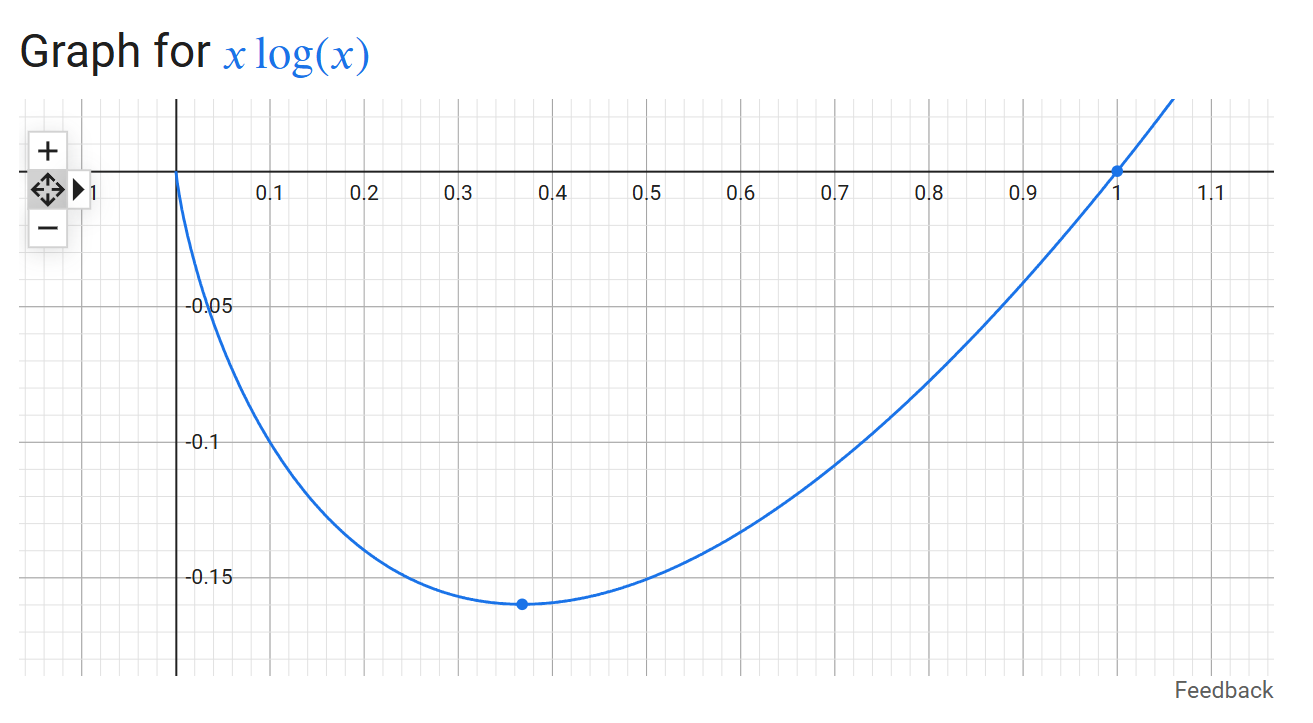

In [ ]:
x = cp.Variable()
y = cp.Variable()
z = cp.Variable()

constraints = [x + y + z == 1]

obj = cp.Maximize(cp.entr(x) + cp.entr(y) + cp.entr(z))

prob = cp.Problem(obj, constraints)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value, y.value, z.value)

status optimal
optimal value 1.0986122875365762
optimal var 0.3333214192540987 0.33335479902444026 0.33332378080284947


In [ ]:
cp.entr(x).curvature

'CONCAVE'

In [ ]:
x.curvature

'AFFINE'

In [ ]:
cp.log(x).curvature

'CONCAVE'

In [ ]:
(x * cp.log(x)).curvature

'UNKNOWN'

## Linear Regression

In [ ]:
n = 100
X = np.random.uniform(0, 1, n)
noise = np.random.normal(0, 1, n)

y = 10 * X + noise

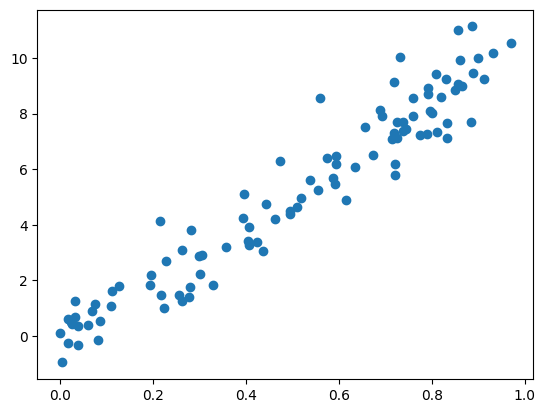

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

In [ ]:
X_prepend = np.column_stack((np.ones(n), X))
X_prepend

array([[1.00000000e+00, 2.62158373e-01],
       [1.00000000e+00, 2.61992796e-01],
       [1.00000000e+00, 8.50289225e-01],
       [1.00000000e+00, 7.43749169e-01],
       [1.00000000e+00, 9.69665666e-01],
       [1.00000000e+00, 7.31996306e-01],
       [1.00000000e+00, 7.91657581e-01],
       [1.00000000e+00, 8.10640671e-01],
       [1.00000000e+00, 4.35735702e-01],
       [1.00000000e+00, 9.11851176e-01],
       [1.00000000e+00, 4.93980445e-01],
       [1.00000000e+00, 2.24533460e-01],
       [1.00000000e+00, 5.54346924e-01],
       [1.00000000e+00, 7.90498496e-01],
       [1.00000000e+00, 3.87084079e-02],
       [1.00000000e+00, 3.01383481e-01],
       [1.00000000e+00, 8.14927656e-02],
       [1.00000000e+00, 7.60397621e-01],
       [1.00000000e+00, 2.27220109e-01],
       [1.00000000e+00, 2.80867555e-01],
       [1.00000000e+00, 8.56285711e-01],
       [1.00000000e+00, 9.30541512e-01],
       [1.00000000e+00, 5.38508296e-01],
       [1.00000000e+00, 6.55266324e-01],
       [1.000000

### Using Normal Equation

In [ ]:
XtX = X_prepend.T @ X_prepend
Xty = X_prepend.T @ y

XtX_inv = np.linalg.inv(XtX)

beta = XtX_inv @ Xty

print("Coefficients:")
print(f"Intercept (beta_0): {beta[0]}")
print(f"Slope (beta_1): {beta[1]}")

Coefficients:
Intercept (beta_0): -0.26799670078185245
Slope (beta_1): 10.77246628778089


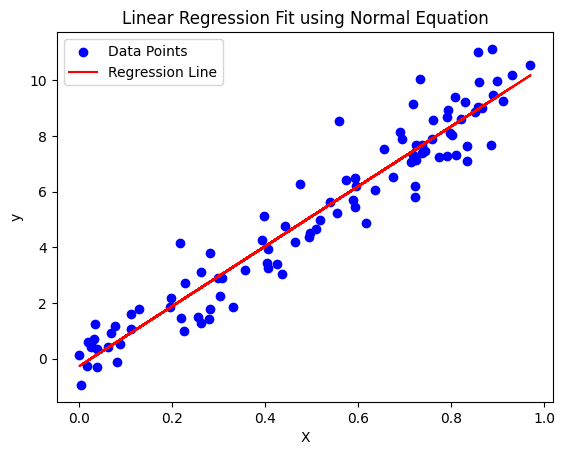

In [ ]:
y_pred = X_prepend @ beta

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit using Normal Equation')
plt.legend()
plt.show()

### Using Convex Optimization

In [ ]:
beta_0 = cp.Variable()  # Intercept
beta_1 = cp.Variable()  # Slope

residuals = y - (beta_0 + beta_1 * X)

objective = cp.Minimize(cp.sum_squares(residuals))

problem = cp.Problem(objective)
problem.solve()

beta_0_value = beta_0.value
beta_1_value = beta_1.value

print("Optimal coefficients:")
print(f"Intercept (beta_0): {beta_0_value}")
print(f"Slope (beta_1): {beta_1_value}")

Optimal coefficients:
Intercept (beta_0): -0.2679967007818562
Slope (beta_1): 10.77246628778091


### Using Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X.reshape(-1, 1), y)

beta_0 = model.intercept_
beta_1 = model.coef_[0]

print("Optimal coefficients:")
print(f"Intercept (beta_0): {beta_0}")
print(f"Slope (beta_1): {beta_1}")

Optimal coefficients:
Intercept (beta_0): -0.26799670078185756
Slope (beta_1): 10.772466287780908


### $R^2$ for Measuring Goodness of Fit

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

$SS_{res} = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$

$SS_{tot} = \sum_{i=1}^{n}(y_i - \bar{y})^2$


In [ ]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.9262861406102392

In [ ]:
r2_score(y, np.ones(n) * np.mean(y))

0.0

In [ ]:
# R^2 can be negative!

r2_score(y, np.ones(n) * (np.mean(y)-10))

-9.360345464900618

## Practice

(P1) Given $N$ numbers, $A_i$, find $m$ that minimizes the squared error, i.e., $\sum_{i=1}^N(A_i-m)^2$. Show that $m$ corresponds to the mean of the numbers, i.e., $m=\frac{1}{N}\sum_{i=1}^N A_i$

Hint: Use $cp.sum\_squares$

In [ ]:
# Minimize the error using cvxpy

N = 10
A = np.random.uniform(0, 100, N)

m = cp.Variable()

obj = cp.Minimize(cp.sum_square(A - m))

prob = cp.Problem(obj)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", m.value)

AttributeError: module 'cvxpy' has no attribute 'sum_square'

In [ ]:
# Compute the mean

np.mean(A)

np.float64(57.95722767729296)

(P2) Under the same constraints, find $m$ that minimizes the absolute error, i.e., $\sum_{i=1}^N|A_i-m|$, and show that it is the median of the numbers.

In [ ]:
# Minimize the error using cvxpy

N = 10
A = np.random.uniform(0, 100, N)

m = cp.Variable()

obj = cp.Minimize(cp.norm(A-m, 1))

prob = cp.Problem(obj)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", m.value)

status optimal
optimal value 266.8821270993901
optimal var 67.03678349882453


In [ ]:
# Compute the median and show the minimum

m = np.median(A)
np.sum(np.abs(A-m))

np.float64(266.88212709939006)

(P3) Given $x_1=0.5, x_2=0.3, x_3=0.2$, find $y_1, y_2, y_3$ that minimizes $\sum_{i=1}^3 x_i log(\frac{x_i}{y_i})$ subject to $y_1+y_2+y_3=1$

Hint: What function in CVXPY computes $x \cdot log(\frac{x}{y})$?

Q1. What happens if there is no constraint?

Q2. Can you prove when it is minimized for the given $(x_1, x_2, x_3)$?

In [ ]:
# Minimize the error using cvxpy

x1 = 0.5
x2 = 0.3
x3 = 0.2

y1 = cp.Variable()
y2 = cp.Variable()
y3 = cp.Variable()

obj = cp.Minimize(cp.rel_entr(x1, y1) + cp.rel_entr(x2,y2) + cp.rel_entr(x3, y3))
constraints = [ y1+y2+y3 == 1]

prob = cp.Problem(obj, constraints)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", y1.value, y2.value, y3.value)

status optimal
optimal value 2.2403375406800334e-09
optimal var 0.5000006276567119 0.29999760961552674 0.20000176050508942


## For more details

- CVXPY tutorial: https://www.cvxpy.org/version/1.2/tutorial/intro/index.html
- What is DCP?: https://www.cvxpy.org/version/1.2/tutorial/dcp/index.html
- Functions you can use in CVXPY: https://www.cvxpy.org/version/1.2/tutorial/functions/index.html
